## **IMPORTING LIBRARIES**

In [1]:
#libraries required for data manipulation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer #diff cols--->diff transformations
from sklearn.pipeline import Pipeline #check, changes applied consistently both prediction and training time ( willl convert both into a singl object )
from sklearn.impute import SimpleImputer #for handling the mising values of the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report, roc_curve, confusion_matrix, auc, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

C:\Users\Piyush\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## **importing the data and taking a quick overview of it**

In [2]:
src_data=pd.read_csv('data/speeddating (1).csv')
src_data.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


###  **DATA DESCRIPTION**

In [3]:
src_data.describe(include='all')

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
count,8378,8378.000000,8378,8283.000000,8274.000000,8378.000000,8378,8378,8378,8378,...,8378,8378,8138.000000,8069.000000,8378,8378,8003.000000,8378,8378,8378
unique,1,NaN,2,NaN,NaN,NaN,4,6,6,2,...,3,3,NaN,NaN,3,3,NaN,2,2,2
top,b'',NaN,b'male',NaN,NaN,NaN,b'[2-3]',b'European/Caucasian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[0-2]',NaN,NaN,b'[6-8]',b'[5-6]',NaN,b'0',b'0',b'0'
freq,8378,NaN,4194,NaN,NaN,NaN,2406,4727,4722,5062,...,7346,4514,NaN,NaN,4827,3199,NaN,4860,4863,6998
mean,NaN,11.350919,NaN,26.358928,26.364999,4.185605,NaN,NaN,NaN,NaN,...,NaN,NaN,6.134087,5.207523,NaN,NaN,0.049856,NaN,NaN,NaN
std,NaN,5.995903,NaN,3.566763,3.563648,4.596171,NaN,NaN,NaN,NaN,...,NaN,NaN,1.841285,2.129565,NaN,NaN,0.282168,NaN,NaN,NaN
min,NaN,1.000000,NaN,18.000000,18.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,7.000000,NaN,24.000000,24.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,5.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,11.000000,NaN,26.000000,26.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,6.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,15.000000,NaN,28.000000,28.000000,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,7.000000,7.000000,NaN,NaN,0.000000,NaN,NaN,NaN


In [4]:
src_data.info(verbose=True) #gives info about the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    has_null                         object 
 1    wave                             float64
 2    gender                           object 
 3    age                              float64
 4    age_o                            float64
 5    d_age                            float64
 6    d_d_age                          object 
 7    race                             object 
 8    race_o                           object 
 9    samerace                         object 
 10   importance_same_race             float64
 11   importance_same_religion         float64
 12   d_importance_same_race           object 
 13   d_importance_same_religion       object 
 14   field                            object 
 15   pref_o_attractive                float64
 16   pref_o_sincere                   float64

In [5]:
src_data.nunique() #gives info about the unique values of each column

has_null               1
wave                  21
gender                 2
age                   24
age_o                 24
                      ..
d_guess_prob_liked     3
met                    7
decision               2
decision_o             2
match                  2
Length: 123, dtype: int64

In [6]:
src_data['match'].unique()


array(["b'0'", "b'1'"], dtype=object)

In [7]:
src_data.columns.to_list()

['has_null',
 'wave',
 'gender',
 'age',
 'age_o',
 'd_age',
 'd_d_age',
 'race',
 'race_o',
 'samerace',
 'importance_same_race',
 'importance_same_religion',
 'd_importance_same_race',
 'd_importance_same_religion',
 'field',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
 'd_pref_o_attractive',
 'd_pref_o_sincere',
 'd_pref_o_intelligence',
 'd_pref_o_funny',
 'd_pref_o_ambitious',
 'd_pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
 'd_attractive_o',
 'd_sinsere_o',
 'd_intelligence_o',
 'd_funny_o',
 'd_ambitous_o',
 'd_shared_interests_o',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
 'd_attractive_important',
 'd_sincere_important',
 'd_intellicence_important',
 'd_funny_important',
 'd_ambtition_important',
 'd_share

### **CHECKING FOR MISSING/NULL VALUES**

In [8]:
pd.set_option('display.max_rows', None)
print(src_data.isnull().sum().sort_values(ascending=False))
pd.reset_option('display.max_rows')

expected_num_interested_in_me      6578
expected_num_matches               1173
shared_interests_o                 1076
shared_interests_partner           1067
ambitous_o                          722
ambition_partner                    712
met                                 375
funny_o                             360
funny_partner                       350
guess_prob_liked                    309
intelligence_o                      306
intelligence_partner                296
sinsere_o                           287
sincere_partner                     277
like                                240
attractive_o                        212
attractive_partner                  202
interests_correlate                 158
pref_o_shared_interests             129
shared_interests_important          121
pref_o_ambitious                    107
attractive                          105
ambition                            105
funny                               105
intelligence                        105


## **FIXING THE MISSING  VALUES**

In [9]:
# Creating transformer groups
high_missing_cols = ['expected_num_interested_in_me', 'expected_num_matches', 
                    'shared_interests_o', 'shared_interests_partner']

perception_cols = ['ambitous_o', 'ambition_partner', 'funny_o', 'funny_partner', 
                  'intelligence_o', 'intelligence_partner', 'sinsere_o', 'sincere_partner',
                  'attractive_o', 'attractive_partner']

demographic_cols = ['age', 'age_o']

preference_cols = ['pref_o_shared_interests', 'pref_o_ambitious', 'pref_o_funny', 
                  'pref_o_intelligence', 'pref_o_sincere', 'pref_o_attractive']

# Additional columns with missing values
remaining_numeric_cols = ['met', 'guess_prob_liked', 'like', 'interests_correlate']
importance_cols = ['shared_interests_important', 'ambtition_important', 'funny_important']
attribute_cols = ['intelligence', 'sincere', 'attractive', 'ambition', 'funny']
expected_cols = ['expected_happy_with_sd_people']

# Finding columns with exactly 79 missing values for interest_cols
interest_cols = [col for col in src_data.columns if src_data[col].isna().sum() == 79]

# Defining transformers with appropriate strategies
transformers=[
    ('highMissing', SimpleImputer(strategy='median'), high_missing_cols), 
    ('perceptions', SimpleImputer(strategy='mean'), perception_cols),
    ('demographics', SimpleImputer(strategy='median'), demographic_cols),
    ('interests', SimpleImputer(strategy='median'), interest_cols),
    ('preferences', SimpleImputer(strategy='mean'), preference_cols),
    ('remainingNumeric', SimpleImputer(strategy='median'), remaining_numeric_cols),
    ('importance', SimpleImputer(strategy='median'), importance_cols),
    ('attributes', SimpleImputer(strategy='median'), attribute_cols),
    ('expected', SimpleImputer(strategy='median'), expected_cols)
]

# Creating the column transformer
preprocessor = ColumnTransformer(transformers)

# Transforming the data
imputed_data = preprocessor.fit_transform(src_data)

# Combining all columns in transformers
all_cols_in_transformers = (high_missing_cols + perception_cols + demographic_cols + 
                           interest_cols + preference_cols + remaining_numeric_cols + 
                           importance_cols + attribute_cols + expected_cols)

# Geting columns that weren't part of the transformation
other_cols = [col for col in src_data.columns if col not in all_cols_in_transformers]

# Creating the new DataFrame with imputed data
imputed_df = pd.DataFrame(
    imputed_data, 
    columns=all_cols_in_transformers
)

# Add back any columns that weren't part of the transformation
for col in other_cols:
    imputed_df[col] = src_data[col].values

# Replace original data with imputed data
src_data = imputed_df.copy()

In [10]:
pd.set_option('display.max_rows', None)
print(src_data.isnull().sum().sort_values(ascending=False))
# Reset to default afterward if desired
pd.reset_option('display.max_rows')

expected_num_interested_in_me      0
d_sincere_partner                  0
d_ambition                         0
d_funny                            0
d_intelligence                     0
d_sincere                          0
d_attractive                       0
d_shared_interests_important       0
d_ambtition_important              0
d_funny_important                  0
d_intellicence_important           0
d_sincere_important                0
d_attractive_important             0
d_shared_interests_o               0
d_ambitous_o                       0
d_funny_o                          0
d_intelligence_o                   0
d_sinsere_o                        0
d_attractive_o                     0
d_pref_o_shared_interests          0
d_pref_o_ambitious                 0
d_pref_o_funny                     0
d_pref_o_intelligence              0
d_pref_o_sincere                   0
d_pref_o_attractive                0
field                              0
d_importance_same_religion         0
d

## **FEATURE ENGINEERING AND ENCODNG**

In [11]:
#label encoding to convert the string values of our target variable into numeric
le = LabelEncoder()
src_data['match'] = le.fit_transform(src_data['match'])
src_data['samerace'] = le.fit_transform(src_data['samerace'])
src_data['gender'] = le.fit_transform(src_data['gender'])
src_data['decision'] = le.fit_transform(src_data['decision'])
src_data['decision_o'] = le.fit_transform(src_data['decision_o'])
src_data['field'] = le.fit_transform(src_data['field'])
src_data=src_data.drop(columns=['race', 'race_o', 'has_null'])

In [12]:
#performing one-hot encoding n the delata variables columns in orer to treat the bin values as categoriical

#firstly, converting b-strings to normal strings
d_columns=[col for col in src_data.columns if col.startswith('d_')]
for col in d_columns:
    src_data[col]=src_data[col].astype(str).str.replace("b'", "").str.replace("'", "")

#one-hot encoding
src_data_encoded=pd.get_dummies(src_data, columns=d_columns)
src_data_encoded = src_data_encoded.replace({True: 1, False: 0})

#saving the results
src_data_encoded.to_excel('speed_dating_finalDATA.xlsx', index=False)


C:\Users\Piyush\AppData\Local\Temp\ipykernel_20564\3607449242.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  src_data_encoded = src_data_encoded.replace({True: 1, False: 0})


## **selecting the features that will be best suited for this model**

In [13]:
#target variable and independent variables declared
X=src_data_encoded.drop(columns=['match'])
y=src_data_encoded['match']

# 1. Filter method: SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
selector.fit(X, y)
selected_features_filter = X.columns[selector.get_support()].tolist()
print("Top 20 features (Filter method):")
print(selected_features_filter)

# 2. Wrapper method: RFE with Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_].tolist()
print("\nTop 20 features (RFE method):")
print(selected_features_rfe)

# 3. Embedded method: Random Forest feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
selected_features_rf = feature_importance_df.head(20)['feature'].tolist()
print("\nTop 20 features (Random Forest importance):")
print(selected_features_rf)

# Finding common features across all methods
common_features = list(set(selected_features_filter) & 
                       set(selected_features_rfe) & 
                       set(selected_features_rf))
print(f"\nCommon features across all methods ({len(common_features)}):")
print(common_features)

Top 20 features (Filter method):
['shared_interests_o', 'shared_interests_partner', 'funny_o', 'funny_partner', 'attractive_o', 'attractive_partner', 'guess_prob_liked', 'like', 'decision', 'decision_o', 'd_attractive_o_[0-5]', 'd_funny_o_[0-5]', 'd_funny_o_[9-10]', 'd_shared_interests_o_[0-5]', 'd_attractive_partner_[0-5]', 'd_funny_partner_[0-5]', 'd_shared_interests_partner_[0-5]', 'd_like_[0-5]', 'd_guess_prob_liked_[0-4]', 'd_guess_prob_liked_[7-10]']

Top 20 features (RFE method):
['attractive_o', 'met', 'like', 'decision', 'decision_o', 'd_age_12.0', 'd_age_8.0', 'd_pref_o_intelligence_[0-15]', 'd_pref_o_intelligence_[16-20]', 'd_pref_o_ambitious_[21-100]', 'd_intelligence_o_[0-5]', 'd_funny_o_[0-5]', 'd_shared_interests_o_[0-5]', 'd_intellicence_important_[0-15]', 'd_intellicence_important_[16-20]', 'd_attractive_[6-8]', 'd_attractive_partner_[0-5]', 'd_funny_partner_[0-5]', 'd_expected_num_matches_[0-2]', 'd_guess_prob_liked_[0-4]']

Top 20 features (Random Forest importance):

In [14]:
# Combine the top features from both ANOVA F-test and Random Forest
combined_features = list(set(selected_features_filter) | set(selected_features_rf))

# Removing variables not reuired
if 'decision' in combined_features:
    combined_features.remove('decision')
if 'decision_o' in combined_features:
    combined_features.remove('decision_o')

# Creating dataset with selected features
X_selected = X[combined_features]

# Print final feature count
print(f"Final feature count: {len(combined_features)}")
print("Selected features:")
print(combined_features)

# Save the selected features dataset
final_data = pd.concat([X_selected, y], axis=1)
final_data.to_csv('speed_dating_selected_features.csv', index=False)

Final feature count: 24
Selected features:
['pref_o_intelligence', 'field', 'attractive_partner', 'attractive_o', 'd_funny_o_[0-5]', 'like', 'shared_interests_partner', 'pref_o_attractive', 'd_shared_interests_partner_[0-5]', 'd_attractive_o_[0-5]', 'd_funny_partner_[0-5]', 'd_guess_prob_liked_[0-4]', 'interests_correlate', 'guess_prob_liked', 'shared_interests_o', 'd_attractive_partner_[0-5]', 'pref_o_shared_interests', 'funny_o', 'd_guess_prob_liked_[7-10]', 'd_funny_o_[9-10]', 'funny_partner', 'd_shared_interests_o_[0-5]', 'expected_num_matches', 'd_like_[0-5]']


## **BUILDING UP THE LOGISTIC REGREESION MODEL**

In [15]:
# Spliting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, stratify=y)

# Saving train and test datasets to CSV files
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Savig to CSV files
train_data.to_csv('speed_dating_train.csv', index=False)
test_data.to_csv('speed_dating_test.csv', index=False)

print("Train and test datasets saved as 'speed_dating_train.csv' and 'speed_dating_test.csv'")

# Model Building
log_reg_model = LogisticRegression(max_iter=2000, solver='liblinear')
log_reg_model.fit(X_train, y_train)

#making predictions
y_pred=log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

#evaluating the model
acc=accuracy_score(y_test, y_pred)
report=classification_report(y_test, y_pred)
cf_matrix=confusion_matrix(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred_proba)

# Printing results
(f"Accuracy: {acc}")
print("\nClassification Report:")
print(report)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Train and test datasets saved as 'speed_dating_train.csv' and 'speed_dating_test.csv'

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1750
           1       0.62      0.26      0.37       345

    accuracy                           0.85      2095
   macro avg       0.75      0.62      0.64      2095
weighted avg       0.83      0.85      0.83      2095

ROC-AUC Score: 0.8470


## **PLOTTING THE CONFUSION MATRIX**

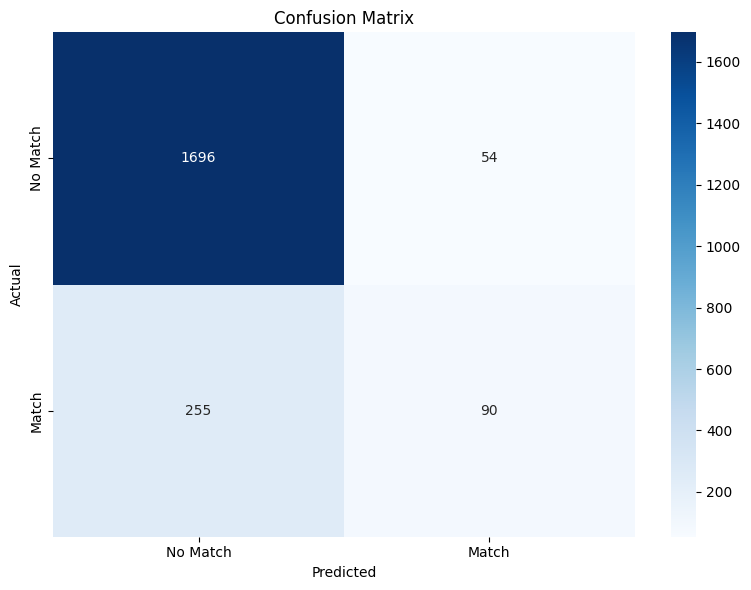

In [16]:
#performing one-hot encoding n the delata variables columns in orer to treat the bin values as categoriical
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Match', 'Match'],
            yticklabels=['No Match', 'Match'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


## **ROC Curve (Receiver Operating Characteristic)**


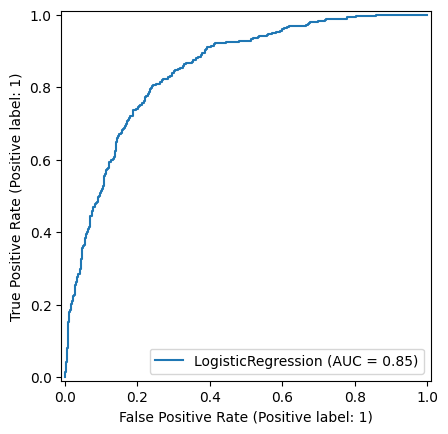

In [17]:
RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test)

## **Precision-Recall Curve**

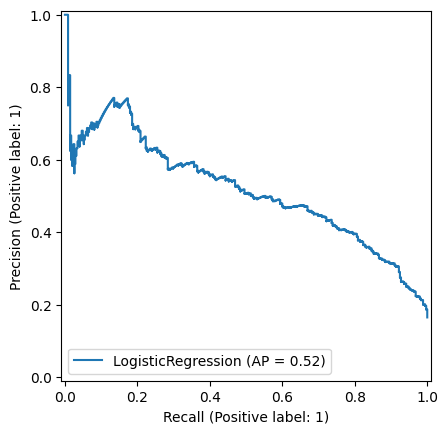

In [18]:
PrecisionRecallDisplay.from_estimator(log_reg_model, X_test, y_test)

## **Feature Importance Plot (for interpretability)**

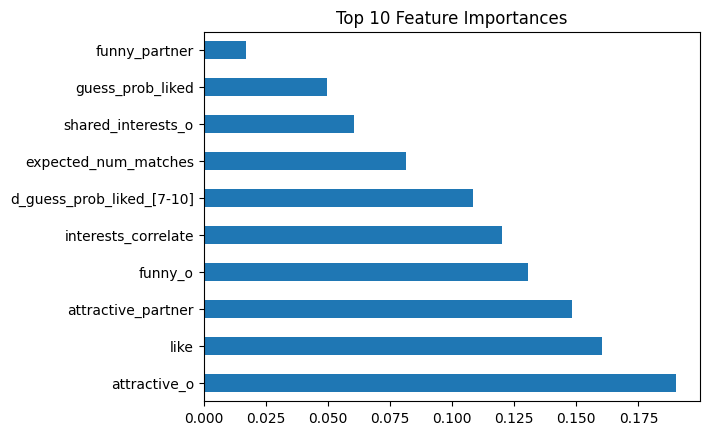

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
coef = pd.Series(log_reg_model.coef_[0], index=X_selected.columns)
coef.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


In [20]:
import joblib

# Save the model
joblib.dump(log_reg_model, 'log_reg_model.sav')

['log_reg_model.sav']